# Visualizando dados RIDE

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import OrderedDict
pd.set_option("display.max_rows", 2000)

# Lendo os dados referentes ao mês de Março de 2013

In [2]:
df = pd.read_csv('/home/marcos/Desktop/dados_teste/clean_data/201303.csv')
del df['VALOR_PARCELA']
del df['MES_REFERENCIA']
del df['NOME_FAVORECIDO']
#MES_REFERENCIA = 201303

In [3]:
df.head()

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,201209,DF,9701,BRASILIA,16129643064
1,201209,DF,9701,BRASILIA,16476322398
2,201209,DF,9701,BRASILIA,16417040640
3,201210,DF,9701,BRASILIA,16129643064
4,201210,DF,9701,BRASILIA,16476322398


## Informações sobre o dataframe

In [4]:
df = df.astype('category') #MUDANDO O DATAFRAME DE NUMERIC PARA CATEGORICAL

In [5]:
df.describe(include='all')

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
count,198963,198963,198963,198963,198963
unique,7,3,34,34,198006
top,201303,GO,9701,BRASILIA,16410149051
freq,198028,98389,91121,91121,7


In [6]:
df2 = df.set_index('NIS_FAVORECIDO')
df2.head()
#df2.loc['16437903555']


,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO
NIS_FAVORECIDO,,,,
16129643064,201209,DF,9701,BRASILIA
16476322398,201209,DF,9701,BRASILIA
16417040640,201209,DF,9701,BRASILIA
16129643064,201210,DF,9701,BRASILIA
16476322398,201210,DF,9701,BRASILIA


## Agrupando o datagrame por UF E NIS

In [7]:
df3 = df
gp = df3.groupby(['UF'])

In [8]:
gp.head(1)

,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,201209,DF,9701,BRASILIA,16129643064
91121,201209,GO,9211,ALTO PARAISO DE GOIAS,16410149051
91127,201209,MG,578,CABECEIRA GRANDE,12876546983


In [9]:
del df3['MES_COMPETENCIA']

In [10]:
gp = df3.groupby(['UF'])

In [11]:
gp.head(1)

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,DF,9701,BRASILIA,16129643064
91121,GO,9211,ALTO PARAISO DE GOIAS,16410149051
91127,MG,578,CABECEIRA GRANDE,12876546983


In [12]:
df4 = df3

In [13]:
df4.head(3)

,UF,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
0,DF,9701,BRASILIA,16129643064
1,DF,9701,BRASILIA,16476322398
2,DF,9701,BRASILIA,16417040640


In [14]:
df4.groupby('UF').count()

,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO
UF,,,
DF,91121,91121,91121
GO,98389,98389,98389
MG,9453,9453,9453


In [15]:
df4['QTD_NIS/UF'] = 0
df4.groupby('UF').count()

,CODIGO_MUNICIPIO_SIAFI,NOME_MUNICIPIO,NIS_FAVORECIDO,QTD_NIS/UF
UF,,,,
DF,91121,91121,91121,91121
GO,98389,98389,98389,98389
MG,9453,9453,9453,9453


In [16]:
data  = OrderedDict({
    'Estado':['DF','GO','MG'],
    'TotalBeneficiario':[91121,98389,9453]
})
df_qtd = pd.DataFrame(data)
df_qtd

,Estado,TotalBeneficiario
0,DF,91121
1,GO,98389
2,MG,9453


## Gŕafico com Matplotlip

In [17]:
#print(list(df_qtd['Estado']))
y_axis = (df_qtd['TotalBeneficiario'].values)
x_axis = list(df_qtd['Estado'])
width_n = 0.3




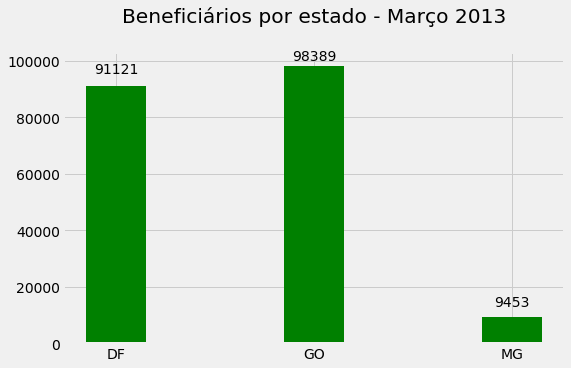

In [19]:
plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, width=width_n, color='green')
plt.style.use('fivethirtyeight')
plt.title('Beneficiários por estado - Março 2013', y = 1.08)
plt.annotate(df_qtd.loc[0,'TotalBeneficiario'], xy=('DF',df_qtd.loc[0,'TotalBeneficiario'] * (1.05)), ha='center')
plt.annotate(df_qtd.loc[1,'TotalBeneficiario'], xy=('GO',df_qtd.loc[0,'TotalBeneficiario'] * (1.1)), ha='center')
plt.annotate(df_qtd.loc[2,'TotalBeneficiario'], xy=('MG',df_qtd.loc[0,'TotalBeneficiario']/(7)), ha='center')

plt.show()

